In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [6]:
df_address = pd.read_csv('address(in).csv')
df_main = pd.read_csv('main(in).csv')
df_paid_record = pd.read_csv('paid_record(in).csv')

In [7]:
df_address

,New_ID,ADDRESS
0,"5008804L,""06042, CT, 31 Mitchell Road""",NaN
1,"5008805G,""72703, AR, 1189 Northwest End Avenue""",NaN
2,"5008806D,""72701, AR, 218 Shipley Alley""",NaN
3,"5008808I,""3138 P Street Northwest, 20007, DC""",NaN
4,"5008809Z,""2405 230th Street, 21122, MD""",NaN
...,...,...
438752,"5680433,""37080, TN, 7730 Wilkinson Road""",NaN
438753,"5353755,""2815 Saint Edwards Drive, 37211, TN""",NaN
438754,"5689895,""85306, AZ, 5434 West Beck Lane""",NaN
438755,"5833391,""05641, VT, 21 Hill Street""",NaN


In [8]:
# Arreglamos la columna ADDRESS para que contenga la dirección, ya que en la columna New_ID se encuentra la dirección y el ID
for i in range(len(df_address["New_ID"])):
    df_address.loc[i, "ADDRESS"] = df_address["New_ID"][i].split('"')[-2]
    df_address.loc[i, "New_ID"] = df_address["New_ID"][i].split('"')[0].replace(",", "") # Eliminamos la dirección del ID

In [9]:
df_address.head()

,New_ID,ADDRESS
0,5008804L,"06042, CT, 31 Mitchell Road"
1,5008805G,"72703, AR, 1189 Northwest End Avenue"
2,5008806D,"72701, AR, 218 Shipley Alley"
3,5008808I,"3138 P Street Northwest, 20007, DC"
4,5008809Z,"2405 230th Street, 21122, MD"


In [10]:
# Repetimos un bucle parecido al anterior para eliminar las letras del ID
for i in range(len(df_address["New_ID"])):
    if df_address.loc[i, "New_ID"][-1] in string.ascii_uppercase:
        df_address.loc[i, "New_ID"] = df_address.loc[i, "New_ID"][:-1]

In [11]:
df_address

,New_ID,ADDRESS
0,5008804,"06042, CT, 31 Mitchell Road"
1,5008805,"72703, AR, 1189 Northwest End Avenue"
2,5008806,"72701, AR, 218 Shipley Alley"
3,5008808,"3138 P Street Northwest, 20007, DC"
4,5008809,"2405 230th Street, 21122, MD"
...,...,...
438752,5680433,"37080, TN, 7730 Wilkinson Road"
438753,5353755,"2815 Saint Edwards Drive, 37211, TN"
438754,5689895,"85306, AZ, 5434 West Beck Lane"
438755,5833391,"05641, VT, 21 Hill Street"


In [12]:
# Renombramos ambas columnas
df_address.rename(columns={"New_ID": "ID"}, inplace=True)
df_main.rename(columns={"Main_ID": "ID"}, inplace=True)

In [13]:
df_address["ID"] = df_address["ID"].astype(int)
df = pd.merge(df_address, df_main, on="ID", how="inner") # Unimos ambos dataframes

In [14]:
df

,ID,ADDRESS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter
0,5008804,"06042, CT, 31 Mitchell Road",M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L
1,5008804,"06042, CT, 31 Mitchell Road",F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,1.0,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L
2,5008805,"72703, AR, 1189 Northwest End Avenue",M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G
3,5008805,"72703, AR, 1189 Northwest End Avenue",M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,1.0,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G
4,5008806,"72701, AR, 218 Shipley Alley",M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439046,6840104,"1699 Chatham Parkway, 31405, GA",M,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,NaN,1.0,0.0,0.0,0.0,NaN,1.0,NaN,L
439047,6840222,"14285 Wycliff Way, 95954, CA",F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007.0,1.0,0.0,0.0,0.0,Laborers,1.0,02/07/1979,Y
439048,6841878,"73034, OK, 1605 Remington Road",NaN,N,N,0.0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-372.0,1.0,1.0,0.0,0.0,Sales staff,1.0,09/10/2000,A
439049,6842765,"73008, OK, 4709 North Willow Avenue",F,N,Y,0.0,72000.0,Pensioner,Secondary / secondary special,Married,NaN,365243.0,1.0,0.0,0.0,0.0,NaN,2.0,20/10/1963,R


In [15]:
df.isna().sum() / len(df) * 100

ID                      0.000000
ADDRESS                 0.000000
CODE_GENDER             2.475567
FLAG_OWN_CAR            2.518614
FLAG_OWN_REALTY         2.497204
CNT_CHILDREN            2.492421
AMT_INCOME_TOTAL        2.537746
NAME_INCOME_TYPE        2.515881
NAME_EDUCATION_TYPE     2.530458
NAME_FAMILY_STATUS      2.503126
NAME_HOUSING_TYPE       2.520664
DAYS_EMPLOYED           2.501532
FLAG_MOBIL              2.520892
FLAG_WORK_PHONE         2.518158
FLAG_PHONE              2.526586
FLAG_EMAIL              2.504720
OCCUPATION_TYPE        32.322441
CNT_FAM_MEMBERS         2.491282
DAYS_BIRTH_CLEAN        2.443452
Letter                  0.000000
dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439051 entries, 0 to 439050
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   439051 non-null  int32  
 1   ADDRESS              439051 non-null  object 
 2   CODE_GENDER          428182 non-null  object 
 3   FLAG_OWN_CAR         427993 non-null  object 
 4   FLAG_OWN_REALTY      428087 non-null  object 
 5   CNT_CHILDREN         428108 non-null  float64
 6   AMT_INCOME_TOTAL     427909 non-null  float64
 7   NAME_INCOME_TYPE     428005 non-null  object 
 8   NAME_EDUCATION_TYPE  427941 non-null  object 
 9   NAME_FAMILY_STATUS   428061 non-null  object 
 10  NAME_HOUSING_TYPE    427984 non-null  object 
 11  DAYS_EMPLOYED        428068 non-null  float64
 12  FLAG_MOBIL           427983 non-null  float64
 13  FLAG_WORK_PHONE      427995 non-null  float64
 14  FLAG_PHONE           427958 non-null  float64
 15  FLAG_EMAIL       

In [17]:
# Sustituimos los valores nulos con moda, media o mediana según el tipo de datos en cada columna
for i in df.columns:
    if i.startswith("FLAG") or df[i].dtype == "object":
        df[i].fillna(df[i].mode()[0], inplace=True)
    elif df[i].dtype == "float64":
        df[i].fillna(df[i].mean(), inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)

In [18]:
df.isna().sum()

ID                     0
ADDRESS                0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
DAYS_BIRTH_CLEAN       0
Letter                 0
dtype: int64

In [19]:
df["DAYS_BIRTH_CLEAN"] = pd.to_datetime(df["DAYS_BIRTH_CLEAN"], yearfirst=True)

C:\Users\NITROPC\AppData\Local\Temp\ipykernel_16956\2293299856.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["DAYS_BIRTH_CLEAN"] = pd.to_datetime(df["DAYS_BIRTH_CLEAN"], yearfirst=True)


In [20]:
columns_to_change_dtype = ["CNT_CHILDREN", "CNT_FAM_MEMBERS", "DAYS_EMPLOYED", "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"]

for i in columns_to_change_dtype:
    df[i] = df[i].astype(int)

In [21]:
df["DAYS_EMPLOYED"] = abs(df["DAYS_EMPLOYED"])

In [22]:
outliers_columns = ["AMT_INCOME_TOTAL", "DAYS_EMPLOYED"]

# Creamos una función para ver la cantidad de outliers que hay en nuestro dataset
def check_outliers (df, columns):
    for columnas in columns:
        Q1 = df[columnas].quantile(0.25)
        Q3 = df[columnas].quantile(0.75)
        IQR = Q3 - Q1
        outlierIzq = Q1-(1.5*IQR)
        outlierDer = Q3+(1.5*IQR)
        outliers = df[columnas][(df[columnas] < outlierIzq) | (df[columnas] > outlierDer)]
        print("La variable " + columnas + " tiene " + str(len(outliers)) + " valores outliers")

check_outliers(df, outliers_columns) # Comprobamos cuántos outliers hay en las columnas seleccionadas

La variable AMT_INCOME_TOTAL tiene 18678 valores outliers
La variable DAYS_EMPLOYED tiene 84572 valores outliers


In [23]:
def reemplazar_outliers_iqr(df, columnas):
    """
    Reemplazamos los outliers del  df usando el método IQR. 
    """
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
        df[columna] = np.where(df[columna] < (Q1 - 1.5 * IQR), Q1, df[columna])
        df[columna] = np.where(df[columna] > (Q3 + 1.5 * IQR), Q3, df[columna])
        
    return df

In [24]:
df = reemplazar_outliers_iqr(df, outliers_columns) # Reemplazamos los outliers de las columnas seleccionadas

<Axes: xlabel='AMT_INCOME_TOTAL'>

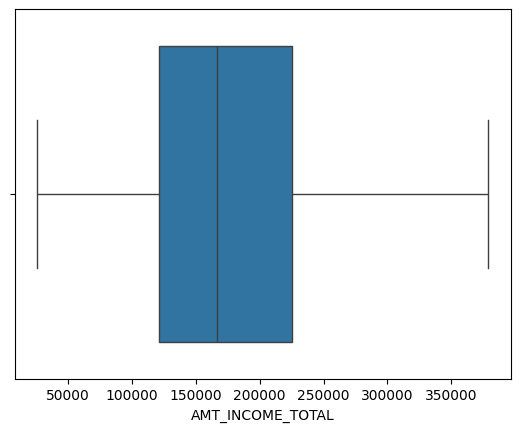

In [389]:
sns.boxplot(x = df["AMT_INCOME_TOTAL"])

<Axes: xlabel='DAYS_EMPLOYED'>

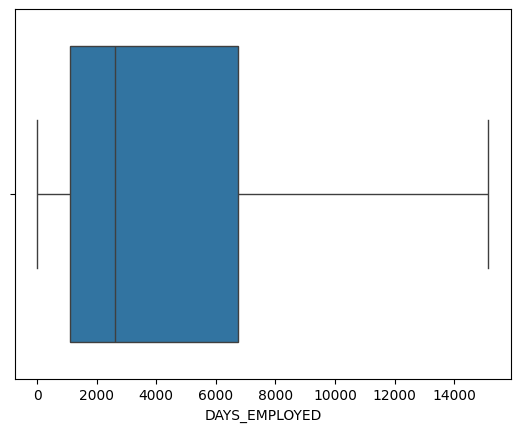

In [390]:
sns.boxplot(x = df["DAYS_EMPLOYED"])

In [45]:
# Agrupamos por ID y STATUS y contamos los meses que ha estado la cuenta con ese STATUS
df_aux = df_paid_record.groupby(["ID", "STATUS"]).agg({"MONTHS_BALANCE": "count"}).reset_index()

In [47]:
df_aux

,ID,STATUS,MONTHS_BALANCE
0,5001711,0,3
1,5001711,X,1
2,5001712,0,10
3,5001712,C,9
4,5001713,X,22
...,...,...,...
94138,5150483,X,18
94139,5150484,0,12
94140,5150484,C,1
94141,5150485,0,2


In [46]:
df_aux[df_aux["STATUS"] == "1"]

,ID,STATUS,MONTHS_BALANCE
10,5001718,1,2
16,5001720,1,7
68,5001757,1,1
109,5001786,1,1
121,5001792,1,3
...,...,...,...
94078,5150412,1,2
94090,5150417,1,1
94109,5150459,1,5
94113,5150463,1,3


In [67]:
df_merged = pd.merge(df, df_aux, on="ID", how="inner") # Unimos los dataframes

In [65]:
df_merged.head(10)

,ID,ADDRESS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,STATUS,MONTHS_BALANCE
0,5008804,"06042, CT, 31 Mitchell Road",M,Y,Y,0,225000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Laborers,2,1990-09-04,L,0,1.0
1,5008804,"06042, CT, 31 Mitchell Road",M,Y,Y,0,225000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Laborers,2,1990-09-04,L,1,1.0
2,5008804,"06042, CT, 31 Mitchell Road",M,Y,Y,0,225000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Laborers,2,1990-09-04,L,C,13.0
3,5008804,"06042, CT, 31 Mitchell Road",M,Y,Y,0,225000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Laborers,2,1990-09-04,L,X,1.0
4,5008804,"06042, CT, 31 Mitchell Road",F,N,Y,1,90000.0,State servant,Secondary / secondary special,Married,...,1,0,0,0,Medicine staff,3,1984-07-06,L,0,1.0
5,5008804,"06042, CT, 31 Mitchell Road",F,N,Y,1,90000.0,State servant,Secondary / secondary special,Married,...,1,0,0,0,Medicine staff,3,1984-07-06,L,1,1.0
6,5008804,"06042, CT, 31 Mitchell Road",F,N,Y,1,90000.0,State servant,Secondary / secondary special,Married,...,1,0,0,0,Medicine staff,3,1984-07-06,L,C,13.0
7,5008804,"06042, CT, 31 Mitchell Road",F,N,Y,1,90000.0,State servant,Secondary / secondary special,Married,...,1,0,0,0,Medicine staff,3,1984-07-06,L,X,1.0
8,5008805,"72703, AR, 1189 Northwest End Avenue",M,Y,Y,0,225000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Laborers,2,1990-09-04,G,0,1.0
9,5008805,"72703, AR, 1189 Northwest End Avenue",M,Y,Y,0,225000.0,Working,Higher education,Civil marriage,...,1,1,0,0,Laborers,2,1990-09-04,G,1,1.0


In [72]:
df_merged.to_csv("main(out).csv", index=False)